In [18]:
import pandas as pd
import numpy as np
from sklearn.decomposition import FactorAnalysis, LatentDirichletAllocation
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt

# Load the datasets
asins = pd.read_csv('asins.csv')
reviews = pd.read_csv('reviews.csv')
bow_representation = pd.read_csv('bag-of-words-representation.csv')




In [19]:
print(bow_representation.head())

   Unnamed: 0  acid  acne  actually  ago  almost  also  always  amazing  \
0           1     0     3         0    0       0     0       0        0   
1           2     0     0         0    0       0     0       0        0   
2           3     0     0         1    0       1     0       0        0   
3           4     0    28         0    0       3     0       1        4   
4           5     0     1         1    0       0     1       0        0   

   amazon  ...  well  will  without  work  worked  works  worth  wrinkles  \
0       0  ...     0     0        0     0       2      2      0         0   
1       0  ...     0     0        0     0       0      1      0         0   
2       0  ...     0     0        0     0       1      0      0         0   
3       2  ...     0     7        1     2       0      4      0         0   
4       0  ...     0     0        0     0       0      0      0         0   

   year  years  
0     0      1  
1     1      0  
2     0      1  
3     0      2  
4

In [20]:
# Strip extra spaces from column names
asins.columns = asins.columns.str.strip()


In [21]:
bow_representation['asin'] = reviews['asin']

# Group by ASIN and calculate the mean for each word count
grouped_bow = bow_representation.groupby('asin').mean()

# Normalize the data
from sklearn.preprocessing import normalize
normalized_bow = normalize(grouped_bow, norm='l1', axis=1)

# Merge the factor scores with titles from 'asins' for plotting
from sklearn.decomposition import FactorAnalysis
fa = FactorAnalysis(n_components=5)
fa_transformed = fa.fit_transform(normalized_bow)

factor_scores_df = pd.DataFrame(fa_transformed, index=grouped_bow.index).reset_index()
merged_df = factor_scores_df.merge(asins[['asin', 'title']], on='asin')

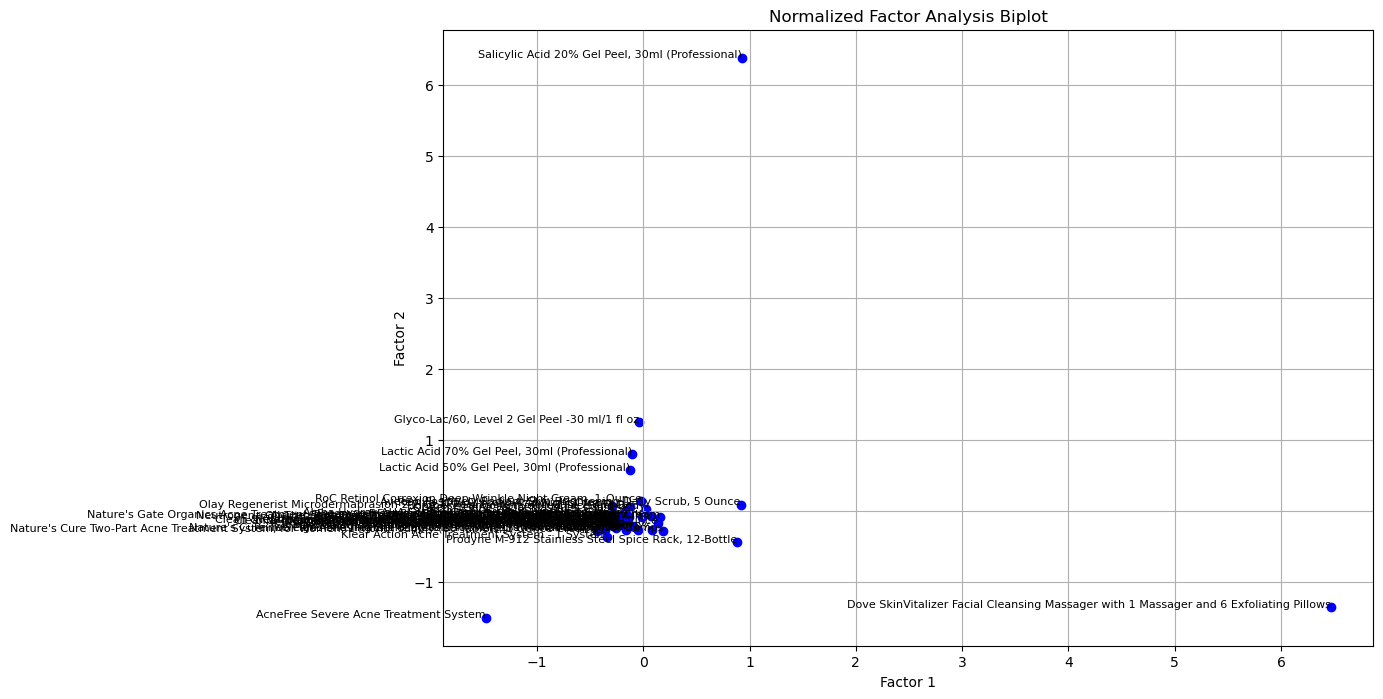

In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt




# Assuming 'asin' is already added to bow_representation as shown previously
# Calculate the mean word counts per product
grouped_bow = bow_representation.groupby('asin').mean()

# Normalize each row by its sum
normalized_bow = grouped_bow.div(grouped_bow.sum(axis=1), axis=0)

# Ensure there are no NaN values after division (could happen if all entries in a row are zero)
normalized_bow.fillna(0, inplace=True)

# Conduct Factor Analysis
fa = FactorAnalysis(n_components=5)
fa_transformed = fa.fit_transform(normalized_bow)


factor_scores_df = pd.DataFrame(fa_transformed, index=normalized_bow.index).reset_index()
merged_df = factor_scores_df.merge(asins[['asin', 'title']], on='asin')

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
for index, row in merged_df.iterrows():
    ax.scatter(row[1], row[2], color='blue')
    ax.text(row[1], row[2], row['title'], fontsize=8, ha='right')

ax.set_xlabel('Factor 1')
ax.set_ylabel('Factor 2')
ax.set_title('Normalized Factor Analysis Biplot')
ax.grid(True)
plt.show()


In [33]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# Load and prepare data (assuming 'reviews.csv' and 'asins.csv' are already loaded)


# Assuming 'asin' column from reviews is to be merged
bow_representation['asin'] = reviews['asin']

# Average the word counts per product
grouped_bow = bow_representation.groupby('asin').mean()

# Apply LDA
n_topics = 5  # Set the number of topics
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
lda.fit(grouped_bow)

# Get topic distributions and word distributions per topic
topic_word_distributions = np.array(lda.components_)
topic_word_distributions /= topic_word_distributions.sum(axis=1)[:, np.newaxis]  # Normalize

# Display top words per topic
words = bow_representation.columns[:-1]  # assuming the last column is 'asin'
for topic_idx, topic in enumerate(topic_word_distributions):
    print(f"Topic #{topic_idx}:")
    print(" ".join([words[i] for i in topic.argsort()[:-10 - 1:-1]]))



Topic #0:
Unnamed: 0 skin product use face using acne like used just
Topic #1:
decided worked acne got pimples amazing bad wash new ever
Topic #2:
decided worked acne got pimples amazing bad wash new ever
Topic #3:
decided worked acne got pimples amazing bad wash new ever
Topic #4:
decided worked acne got pimples amazing bad wash new ever


In [40]:
!pip list | grep pyLDAvis


pyLDAvis                      3.4.1


In [38]:
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis

import matplotlib.pyplot as plt

# Ensuring pyLDAvis is enabled in Jupyter (if using Jupyter Notebook or Lab)
pyLDAvis.enable_notebook()


# Convert to a dense DataFrame
dense_bow = grouped_bow.reset_index(drop=True)

# Apply LDA
n_topics = 5  # You may need to tune this number
lda = LatentDirichletAllocation(n_components=n_topics, random_state=0, learning_method='batch')
lda.fit(dense_bow)

# Preparing visualization with pyLDAvis
data_vis = pyLDAvis.prepare(lda, dense_bow, CountVectorizer(), mds='tsne')

# Display the interactive visualization
pyLDAvis.display(data_vis)



TypeError: prepare() missing 2 required positional arguments: 'vocab' and 'term_frequency'

In [36]:
!pip install --upgrade pyLDAvis
